# 통합 측정지표(Integration Metrics)

## 최단 경로(Shortest Path)

최단 경로: [0, 6, 4, 3, 1]


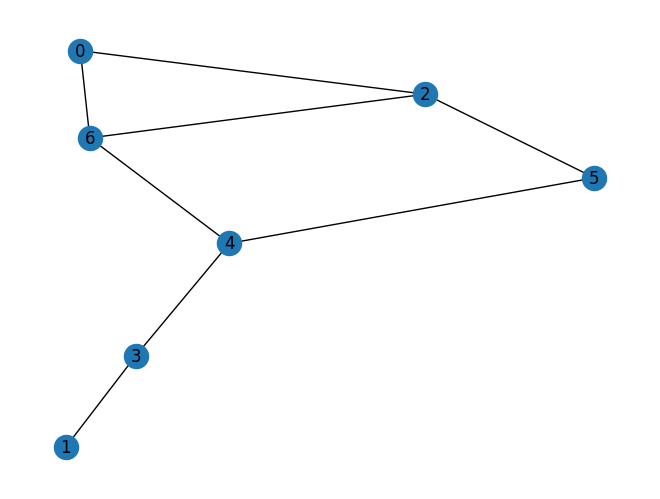

In [21]:
import networkx as nx


G = nx.Graph()
nodes = {0: "서울", 1: "부산", 2: "인천", 3: "대구", 4: "대전", 5: "광주", 6: "수원"}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(0, 2), (0, 6), (1, 3), (2, 5), (2, 6), (3, 4), (4, 5), (4, 6)])

shortest_path = nx.shortest_path(G, source=0, target=1)  # 0: 서울, 1: 부산
print(f"최단 경로: {shortest_path}")

nx.draw(G, with_labels=True)  # 그래프 시각화

## 특성 경로 길이(Characteristic Path Length)

In [22]:
print(f"특성 경로 길이: {nx.average_shortest_path_length(G)}")

특성 경로 길이: 2.0


## 대역 효율성(Global Efficiency)

완전 연결 그래프의 대역 효율성: 1.0


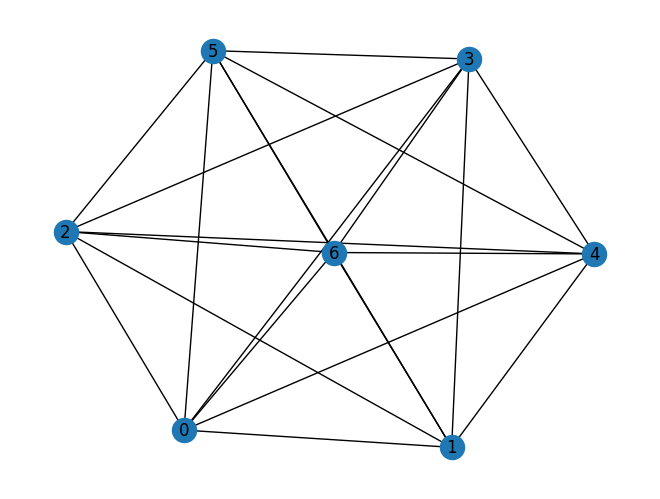

In [3]:
fully_connected_G = nx.complete_graph(7)  # 완전 연결 그래프
nx.draw(fully_connected_G, with_labels=True)  # 그래프 시각화
print(f"완전 연결 그래프의 대역 효율성: {nx.global_efficiency(fully_connected_G)}")

원형 그래프의 대역 효율성: 0.6111111111111109


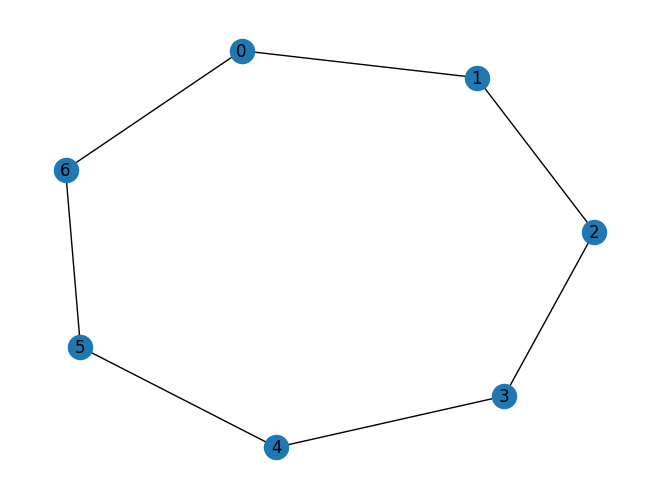

In [8]:
circulant_G = nx.circulant_graph(7, offsets=[1])  # 원형 그래프
nx.draw(circulant_G, with_labels=True)  # 그래프 시각화
print(f"원형 그래프의 대역 효율성: {nx.global_efficiency(circulant_G)}")

# 분리 측정지표(Segregation Metrics)

## 군집 계수(Clustering Coefficient)

대역 군집 계수: 0.23809523809523808
국소 군집 계수: {0: 1.0, 1: 0, 2: 0.3333333333333333, 3: 0, 4: 0, 5: 0, 6: 0.3333333333333333}


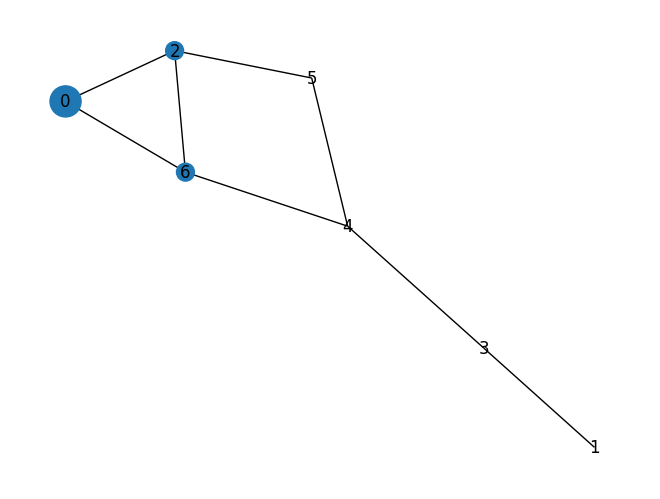

In [22]:
G = nx.Graph()
nodes = {0: "서울", 1: "부산", 2: "인천", 3: "대구", 4: "대전", 5: "광주", 6: "수원"}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(0, 2), (0, 6), (1, 3), (2, 5), (2, 6), (3, 4), (4, 5), (4, 6)])

print(f"대역 군집 계수: {nx.average_clustering(G)}")
print(f"국소 군집 계수: {nx.clustering(G)}")

nx.draw(G, with_labels=True, node_size=list(map(lambda x: 500*x, nx.clustering(G).values())))  # 그래프 시각화

## 전이성(Transitivity)

In [23]:
print(f"전이성: {nx.transitivity(G)}")

전이성: 0.25


## 모듈성(Modularity)

In [25]:
print(f"모듈성: {nx.algorithms.community.modularity(G, communities=[{0, 2, 6}, {1, 3, 4, 5}])}")

모듈성: 0.25


# 중심성 측정지표(Centrality Metrics)

## 연결 중심성(Degree Centrality)

In [26]:
print(f"연결 중심성: {nx.degree_centrality(G)}")

연결 중심성: {0: 0.3333333333333333, 1: 0.16666666666666666, 2: 0.5, 3: 0.3333333333333333, 4: 0.5, 5: 0.3333333333333333, 6: 0.5}


## 근접 중심성(Closeness Centrality)

In [27]:
print(f"근접 중심성: {nx.closeness_centrality(G)}")

근접 중심성: {0: 0.46153846153846156, 1: 0.35294117647058826, 2: 0.5, 3: 0.5, 4: 0.6666666666666666, 5: 0.5454545454545454, 6: 0.6}


## 매개 중심성(Betweenness Centrality)

In [28]:
print(f"매개 중심성: {nx.betweenness_centrality(G)}")

매개 중심성: {0: 0.0, 1: 0.0, 2: 0.1, 3: 0.3333333333333333, 4: 0.5666666666666667, 5: 0.1, 6: 0.3}


## 중심성 측정지표 비교

Text(0.5, 1.0, '매개 중심성')

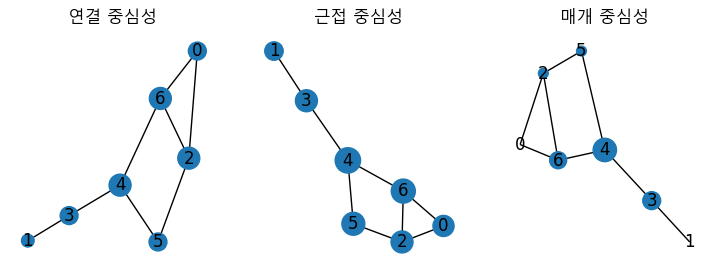

In [32]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")


fig, subs = plt.subplots(ncols=3, figsize=(9, 3))

nx.draw(G, with_labels=True, node_size=list(map(lambda x: 500*x, nx.degree_centrality(G).values())), ax=subs[0])  # 연결 중심성
subs[0].set_title("연결 중심성")

nx.draw(G, with_labels=True, node_size=list(map(lambda x: 500*x, nx.closeness_centrality(G).values())), ax=subs[1])  # 근접 중심성
subs[1].set_title("근접 중심성")

nx.draw(G, with_labels=True, node_size=list(map(lambda x: 500*x, nx.betweenness_centrality(G).values())), ax=subs[2])  # 매개 중심성
subs[2].set_title("매개 중심성")

# 탄력성 측정지표(Resilience Metrics)

## 동류성(Assortativity)

In [33]:
print(f"동류성: {nx.degree_pearson_correlation_coefficient(G)}")

동류성: -2.7755575615628914e-17


---